Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Jennifer Luu"

---

# Homework 10

In this assignment, we're working with SQL. In particular, we'll be working with the SAKILA database. This database contains transactions from a fictional chain of DVD rental stores. You can find the files you need to install the SAKILA database [here](https://dev.mysql.com/doc/index-other.html). Click on the `zip` option for the SAKILA database. Unzip the directory you downloaded. 

To create the database on the MySQL server on your machine:

1. Save the files `sakila-schema.sql` and `sakila-data.sql` from the unzipped directory under some path on your machine, say under "MyPath/sakila-schema.sql"
2. Log on to MySQL as root and run the following commands (I'm assuming that 'user' is an existing user that you have previously created). 

```
CREATE DATABASE Sakila;
GRANT ALL PRIVILEGES ON Sakila.* to 'user'@'localhost';
USE Sakila;
SOURCE MyPath/sakila-schema.sql;
SOURCE MyPath/sakila-data.sql;
QUIT;
```

3. Then log on as the user and change the database to Sakila. 

```
USE Sakila;
```

You can find an ER-schema of the Sakila database on Canvas. 

For some of the problems below you are asked to show the SQL code which you would run in order to find the answer to a specific question. You can show both the SQL code and your answer to the question in a Markdown cell. Note, that you should be able to write down the SQL code, even if you were not able to install MySQL or the Sakila database on your machine. You *do not* have to include the output you get from MySQL for these types of questions. 

**Example Question:** How many different languages can you find in the `language` table? 

**Example Answer:**

SQL code: 
```SELECT * from language;``` 

Answer: 6 different languages. 

For other problems, you will be asked to obtain data and then do something with those data in python. You will only be able to complete these problems, if you were able to install MySQL and download the Sakila database. If you still need help with installing MySQL, ask me as soon as possible. I will not be available for "tech help" on the day this homework is due. 

### Problem 1

Describe the `Rental` table. How many columns does that table have? How many entries are in the table? What is the primary key of the `Rental` table? How is it generated? 

The Rental table has 7 columns and 16,044 rows (entries). The primary key of the Rental table is rental_id. It is generated by auto-increment, which means that the system creates a unique ID when a new entry is added into the table. The user does not have to manually create the rental ID. 

Other details about the Rental table include that the return date is the only column variable that does not need a specified value when an entry is added. 

### Problem 2

What are the variable types of the variables `staff_id`, `customer_id`, and `rental_id` in the `Rental` table, respectively? Why is it useful or necessary to use these different variable types for these three variables? Why can't they all be stored as tinyint's for example? 

The variable types for staff ID, customer ID, and rental ID are tinyint unsigned, smallint unsigned, and int, respectively. 

It is necessary to use different variables types to efficiently and appropriately allocate enough storage for them.

It makes sense for staff ID to be tinyint unsigned (0 to 255) because it is reasonable for a chain of DVD rental stores to have hundreds of employees. The unsigned specification signals that the values can only be positive because positive integers are normally used as ID numbers. 

In addition, customer ID is appropriately smallint unsigned (0 to 65,535) because there can be  tens of thousands of customers who use this chain of DVD rental stores. Unsigned indicates positive values, which makes sense in this context because ID identifies are typically positive. 

Lastly, rental ID is reasonably int (−2,147,483,648 to 2,147,483,647) because each customer can have multiple rentals. There can be tens of thousands of customers across the stores, which implies that the number of rentals will scale in regards to the number of customers. Therefore, it is realistic to expect millions of transactions denoted each as a rental ID. However, rental ID is not specified to be unsigned because it is auto-increment. The default for auto-increment is signed, which includes both positive and negative numbers.

Overall, these variables cannot use the same variable type because each one has a different size demand to represent data realistically. 

### Problem 3

Provide the SQL code with which you would update the `Actor` table with a new row that has your own first and last name. The command for today's date in SQL is `NOW()`. 

Then provide the SQL code with which you would remove all rows with your name (first and last) from the actors table. 

SQL code to insert: 
```
INSERT INTO actor
(actor_id, first_name, last_name, last_update)
VALUES (201, 'JEN', 'LUU', NOW());
```

SQL code to remove all rows with my name:
```
DELETE FROM actor WHERE first_name = 'JEN' AND last_name = 'LUU';
```

### Problem 4

(a) Use Python to extract the columns `staff_id`, `amount`, and `payment_date` from the `Payment` table. 
Store these data in a Pandas data frame and display the data frame to the console for the grader to see.

In [2]:
import mysql.connector
import pandas as pd

# YOUR CODE HERE
# deleted dictionary with password 
cnx = mysql.connector.connect(**config2) 
cursor = cnx.cursor()

#Select specific columns from payment table
cursor.execute("SELECT staff_id, amount, payment_date FROM payment")
results = cursor.fetchall()

cursor.close()                                  
cnx.close() 

#Create data frame
payment_data = pd.DataFrame(results, columns = ["staff_id", "amount", "payment_date"])   
payment_data


,staff_id,amount,payment_date
0,1,2.99,2005-05-25 11:30:37
1,1,0.99,2005-05-28 10:35:23
2,1,5.99,2005-06-15 00:54:12
3,2,0.99,2005-06-15 18:02:53
4,2,9.99,2005-06-15 21:08:46
...,...,...,...
16044,1,4.99,2005-08-21 17:43:42
16045,1,1.99,2005-08-21 21:41:57
16046,2,8.99,2005-08-23 06:09:44
16047,2,2.99,2005-08-23 11:08:46


(b) For the dataframe created in (a), take the date values and use either string formating or the `pd.DatetimeIndex()` method  to extract just the month and the year of the transaction. Store both in separate columns of the data frame. 

Use groupby to find the total monthly transaction amounts, separately for each employee. 

Use Matplotlib to create a line-plot that shows the total transaction amount per employee per month as a function of time. Label the x-axis with the appropriate month/year combination and include one line per employee. Include a legend to indicate which line belongs to which employee. You can find an image on Canvas with an example of what your graph should look like. 

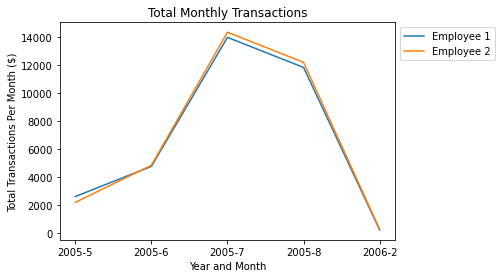

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# YOUR CODE HERE

#Extract just the month and year of each transaction and store in separate columns
payment_data["year"] = pd.DatetimeIndex(payment_data["payment_date"]).year
payment_data["month"] = pd.DatetimeIndex(payment_data["payment_date"]).month

#set the index by staff ID and groupby to find total monthly transaction amounts for each employee
payment_df = payment_data.set_index("staff_id")
employee1 = payment_df.loc[1].groupby(["year", "month"]).sum()
employee2 = payment_df.loc[2].groupby(["year", "month"]).sum()

x = np.arange(5)

#obtain the dates as a string with year and month
dates = []
for i in range(5):
    current = str(employee1.index[i][0]) + "-" + str(employee1.index[i][1])
    dates.append(current)

#create line graph for each employee
plt.plot(x, employee1.amount, label = "Employee 1")
plt.plot(x, employee2.amount, label = "Employee 2")
plt.xticks(np.arange(0,5, step = 1), dates)
plt.xlabel("Year and Month")
plt.ylabel("Total Transactions Per Month ($)")
plt.title("Total Monthly Transactions")
plt.legend(bbox_to_anchor = (1,1));